In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
df0 = pd.read_csv('http://nucsmb/data/small_csv_files//DimenLookupAge8277.csv',encoding='latin1') 

In [27]:
df0.sample()

,Code,Description,SortOrder
34,7,Seven years,35


In [29]:
df0.head()

,Code,Description,SortOrder
0,999999,Total people - age group,1
1,888,Median age,2
2,1,Under 15 years,3
3,2,15-29 years,4
4,3,30-64 years,5


In [31]:
df0.loc[0, 'Code'] = 0
df0.loc[1, 'Code'] = 155	
df0.head()

,Code,Description,SortOrder
0,0,Total people - age group,1
1,155,Median age,2
2,1,Under 15 years,3
3,2,15-29 years,4
4,3,30-64 years,5


In [32]:
print(df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         148 non-null    int64 
 1   Description  148 non-null    object
 2   SortOrder    148 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ KB
None


In [33]:
print(df0.describe())                      # Statistical summary
print(df0.describe(include='object'))      # Summary for categorical variables

             Code   SortOrder
count  148.000000  148.000000
mean    51.729730   74.500000
std     38.203108   42.868014
min      0.000000    1.000000
25%     16.000000   37.750000
50%     47.500000   74.500000
75%     84.250000  111.250000
max    155.000000  148.000000
                     Description
count                        148
unique                       148
top     Total people - age group
freq                           1


In [34]:
df_clean = df0.dropna()                               # Drop all rows with any NaN

In [35]:
df_clean.tail()

,Code,Description,SortOrder
143,116,116 years,144
144,117,117 years,145
145,118,118 years,146
146,119,119 years,147
147,120,120 years and over,148


In [36]:
numeric_features = ["Code", "SortOrder"]
categorical_features = ["Description"]

In [37]:
# Preprocessing for numeric data: scale values
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

In [38]:
# Preprocessing for categorical data: one-hot encode
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [39]:
# Full pipeline with KMeans
kmeans_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clusterer", KMeans(n_clusters=5, random_state=42))
])

In [40]:
# Fit the pipeline
kmeans_pipeline.fit(df_clean)

,steps,"[('preprocessor', ...), ('clusterer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [41]:
# Get cluster labels
labels = kmeans_pipeline["clusterer"].labels_
df_clean["Cluster"] = labels

# Get cluster centers (in transformed space)
centers = kmeans_pipeline["clusterer"].cluster_centers_

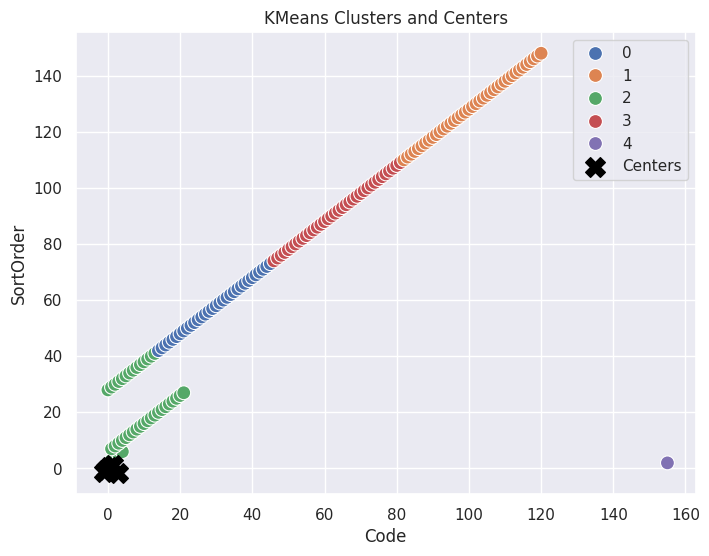

In [47]:
# --- Visualization ---
plt.figure(figsize=(8,6))
sns.scatterplot(x="Code", y="SortOrder", hue="Cluster", data=df_clean, palette="deep", s=100)

# Plot cluster centers for numeric features
# Extract numeric centers (first two columns of transformed centers)
numeric_centers = centers[:, :len(numeric_features)]

plt.scatter(numeric_centers[:,0], numeric_centers[:,1],
            c='black', s=200, marker='X', label='Centers')

plt.title("KMeans Clusters and Centers")
plt.legend()
plt.savefig('test.png')
plt.show()

In [50]:
df = df0.dropna() 

In [51]:
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), ["Description"])
], remainder="passthrough")  
# Keep numeric columns

regression_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [52]:
X = df[["Code", "Description"]]
y = df["SortOrder"]
regression_pipeline.fit(X, y)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [55]:
y_pred = regression_pipeline.predict(X)
print("R²:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

R²: 1.0
MSE: 6.9092100544174e-18


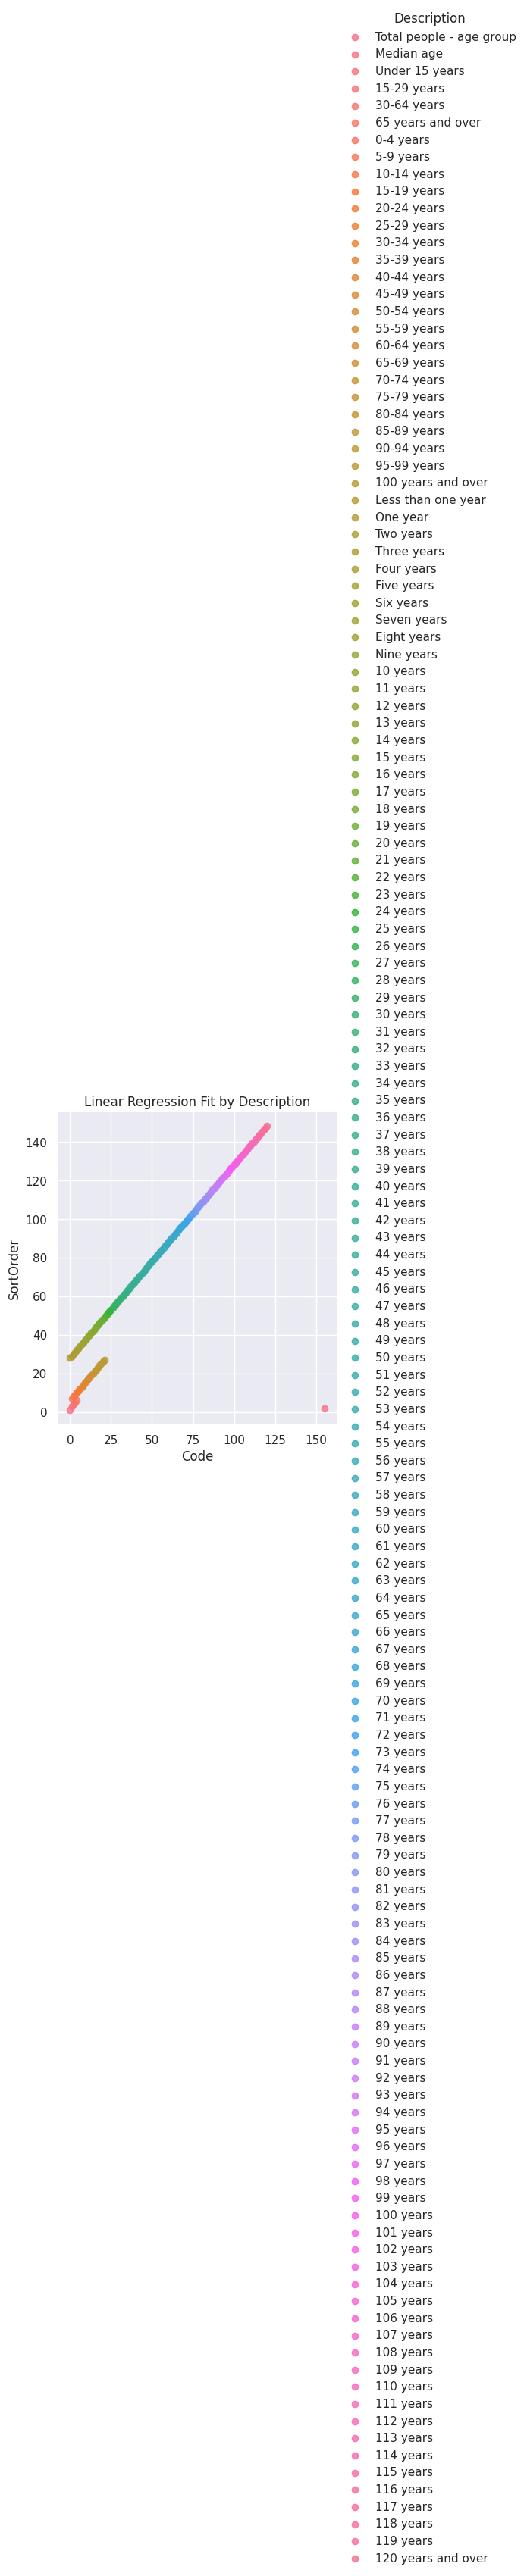

In [56]:
#Regression line plot
sns.lmplot(x="Code", y="SortOrder", data=df, hue="Description", ci=None)
plt.title("Linear Regression Fit by Description")
plt.savefig('RegressionLinePlot.png')
plt.show()

In [ ]:
#Residual plot